First 5 rows:
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \


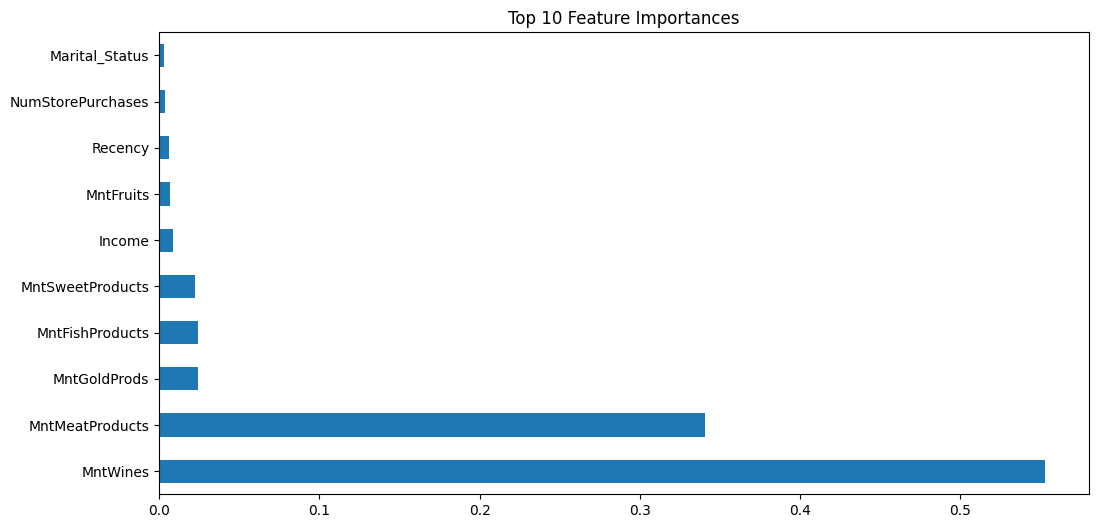

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the dataset
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')  # Adjust path if needed
print("First 5 rows:\n", df.head())

# Step 3: Drop unnecessary columns (like ID, date fields if not needed)
df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Step 4: Handle missing values
df.dropna(inplace=True)

# Step 5: Encode categorical variables
categorical_cols = ['Education', 'Marital_Status']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Step 6: Create a target variable
# Let's define 'High-Value Customers' based on total spend (can be adjusted)
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Segment'] = pd.qcut(df['Total_Spend'], q=3, labels=['Low', 'Medium', 'High'])  # 3 categories

# Step 7: Define features and target
X = df.drop(['Segment', 'Total_Spend'], axis=1)
y = df['Segment']

# Step 8: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 9: Train Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Step 10: Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Feature Importance Visualization
plt.figure(figsize=(12, 6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()
